# Logistics Regression



## Theoretical Understanding:

1. Tutorial 35:Logitic Regression Part 1 https://www.youtube.com/watch?v=L_xBe7MbPwk
2. Tutorial 36:Logitic Regression Part 2 https://www.youtube.com/watch?v=uFfsSgQgerw
3. Tutorial 39:Logitic Regression Part 3 https://www.youtube.com/watch?v=V8fS0T_ktn4
4. Tutorial 42:How To Find Optimal Threshold for Binary classification: https://www.youtube.com/watch?v=_AjhdXuXEDE
5. Interview question: https://www.youtube.com/watch?v=tcaruVHXZwE&t=122s

### What Are the Basic Assumption?
1. Linear Relation between independent features and the log odds

### Advantages
Advantages of Logistics Regression

1. Logistic Regression Are very easy to understand
2. It requires less training
3. Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.
4. It makes no assumptions about distributions of classes in feature space.
5. Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.One may consider Regularization (L1 and L2) techniques to avoid over-fittingin these scenarios.
6. Logistic regression is easier to implement, interpret, and very efficient to train.


### Disadvantages
1. Sometimes Lot of Feature Engineering Is required
2. If the independent features are correlated it may affect performance
3. It is often quite prone to noise and overfitting
4. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.
5. 	Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. Linearly separable data is rarely found in real-world scenarios.
6. It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.
7. In Linear Regression independent and dependent variables are related linearly. But Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).

### Whether Feature Scaling is required?
yes

### Missing Values
Sensitive to missing values

### Impact of outliers?
Like linear regression, estimates of the logistic regression are sensitive to the unusual observations: outliers, high leverage, and influential observations. Numerical examples and analysis are presented to demonstrate the most recent outlier diagnostic methods using data sets from medical domain

### Types of Problems it can solve(Supervised)
1. Classification

### Practical Implementation
1. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Performance Metrics

### Classification
1. Confusion Matrix 
2. Precision,Recall, F1 score

1. Part 1 https://www.youtube.com/watch?v=aWAnNHXIKww
2. Part 2 https://www.youtube.com/watch?v=A_ZKMsZ3f3o

## My Explaiination

<img src="https://raw.githubusercontent.com/Mhnd-DS/ML-Models-Journey/main/Logistic%20Regression/lg1.jpg" alt="drawing" width="800"/>

## Implementation

### Binary Classification

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')

In [45]:
df[:3]

,age,bought_insurance
0,22,0
1,25,0
2,47,1


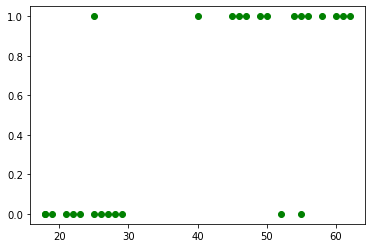

In [46]:
plt.scatter(df.age,df.bought_insurance,marker='o',color='green')

In [47]:
X = df.drop('bought_insurance' , axis =1)
y = df['bought_insurance']

<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

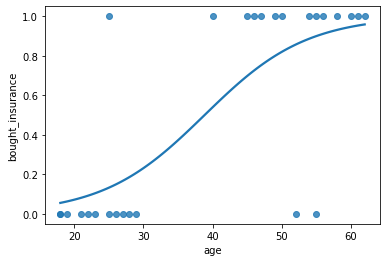

In [48]:
sns.regplot(x=X, y=y, data=df, logistic=True, ci=None)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [50]:
from sklearn import set_config
set_config(print_changed_only=False)

In [51]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
model = LogisticRegression().fit(X_train, y_train)

In [53]:
y_pred = model.predict(X_test)

In [54]:
model.predict_proba(X_test)

array([[0.1123483 , 0.8876517 ],
       [0.13725093, 0.86274907],
       [0.38548348, 0.61451652],
       [0.10144174, 0.89855826],
       [0.20085039, 0.79914961],
       [0.41289601, 0.58710399]])

#### how sigmoid is calc?

In [55]:
model.coef_

array([[0.1143313]])

In [56]:
model.intercept_

array([-4.79290214])

In [57]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))


def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [59]:
age = 40
prediction_function(age)

0.5374298453437496

### Multi CLASSIFICATION

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [10]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [11]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

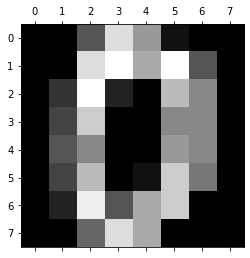

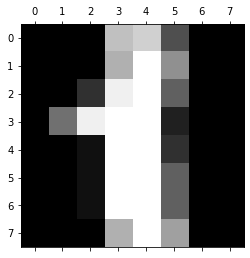

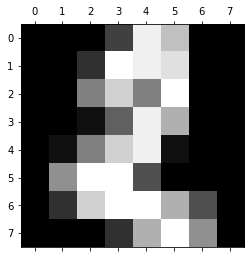

In [3]:
plt.gray() 
for i in range(3):
    plt.matshow(digits.images[i]) 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2, random_state = 40)


model = LogisticRegression().fit(X_train, y_train)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
model.score(X_test, y_test)

0.9638888888888889

In [40]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [27]:
y_predicted = model.predict(X_test)

Text(69.0, 0.5, 'Truth')

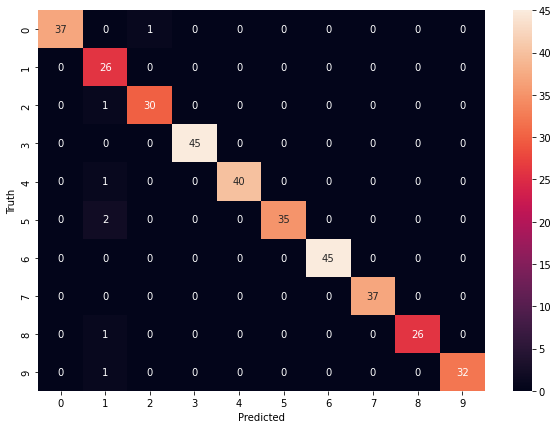

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')